In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

<Axes: >

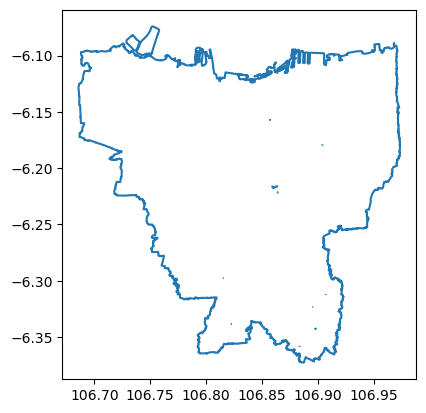

In [2]:
jakarta_boundary = gpd.read_file("Boundary_DKI_Jakarta.geojson")
jakarta_boundary.boundary.plot()

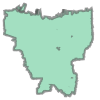

In [3]:
polygon = jakarta_boundary.geometry.iloc[0]
polygon

<Axes: >

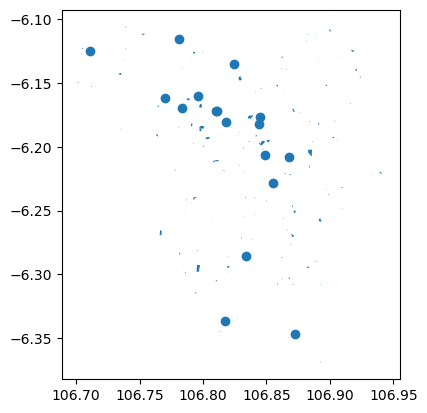

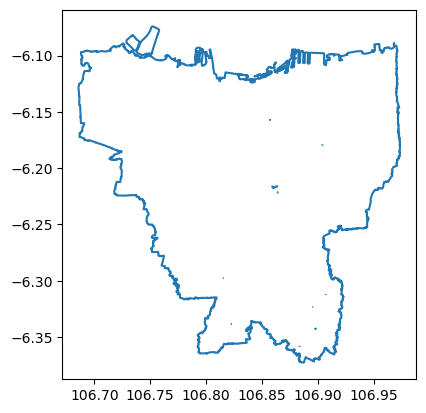

In [5]:
raw_data = ox.features_from_polygon(polygon, tags={'amenity' : 'hospital'})
raw_data.plot()
jakarta_boundary.boundary.plot()

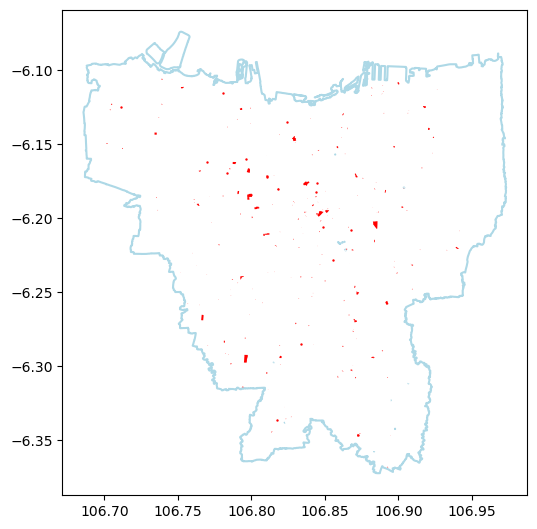

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,8))

# Plot the cafe data on the axis
raw_data.plot(ax=ax, color='red', marker='.', markersize=2)

# Plot the boundary of the location on the same axis
jakarta_boundary.boundary.plot(ax=ax, color='lightblue')

# Show the plot
plt.show()

In [7]:
raw_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 227 entries, ('node', 5673769073) to ('relation', 12613976)
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   addr:city              187 non-null    object  
 1   addr:housenumber       20 non-null     object  
 2   addr:postcode          34 non-null     object  
 3   addr:street            31 non-null     object  
 4   amenity                227 non-null    object  
 5   healthcare             118 non-null    object  
 6   name                   217 non-null    object  
 7   geometry               227 non-null    geometry
 8   opening_hours          30 non-null     object  
 9   operator               9 non-null      object  
 10  source                 178 non-null    object  
 11  emergency              15 non-null     object  
 12  healthcare:speciality  29 non-null     object  
 13  name:en                12 non-null     object  
 

In [8]:
data_prep = raw_data[['name','geometry']]
data_prep

name  \
element_type osmid                                                      
node         5673769073                                           NaN   
             5673769080                                           NaN   
             5673769081                    Rumah Sakit Pelita Harapan   
             5673769082                                           NaN   
             5751013085                                      Dentista   
...                                                               ...   
way          1151600428                    Rumah Sakit Mitra Keluarga   
relation     7409174     Rumah Sakit Bhayangkara TK. IR. Said Sukanto   
             7409284                 Rumah Sakit DIK Pusdikkes TNI AD   
             10908525                             Rumah Sakit Zahirah   
             12613976               Rumah Sakit Pertamina Jaya (RSPJ)   

                                                                  geometry  
element_type osmid                                                          
node         5673769073                         POINT (106.84482 -6.17631)  
             5673769080                         POINT (106.76981 -6.16197)  
             5673769081                         POINT (106.78371 -6.16982)  
             5673769082                         POINT (106.82439 -6.13483)  
             5751013085                         POINT (106.83356 -6.28550)  
...                                                                    ...  
way          1151600428  POLYGON ((106.89736 -6.15251, 106.89781 -6.151...  
relation     7409174     MULTIPOLYGON (((106.86986 -6.26826, 106.86993 ...  
             7409284     MULTIPOLYGON (((106.86929 -6.27687, 106.86938 ...  
             10908525    POLYGON ((106.82349 -6.33585, 106.82334 -6.335...  
             12613976    POLYGON ((106.87575 -6.17292, 106.87576 -6.172...  

[227 rows x 2 columns]

In [9]:
data_prep['geometry'] = data_prep['geometry'].centroid

C:\Users\abaih\AppData\Local\Temp\ipykernel_19856\1923607818.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_prep['geometry'] = data_prep['geometry'].centroid
C:\Users\abaih\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [10]:
data_clean = data_prep.dropna()
data_clean

name  \
element_type osmid                                                      
node         5673769081                    Rumah Sakit Pelita Harapan   
             5751013085                                      Dentista   
             5994596682               Rumah Sakit Ketergantungan Obat   
             6249775451                                   RSIA Tambak   
             8244411780                     apotik & Lab Muara Karang   
...                                                               ...   
way          1151600428                    Rumah Sakit Mitra Keluarga   
relation     7409174     Rumah Sakit Bhayangkara TK. IR. Said Sukanto   
             7409284                 Rumah Sakit DIK Pusdikkes TNI AD   
             10908525                             Rumah Sakit Zahirah   
             12613976               Rumah Sakit Pertamina Jaya (RSPJ)   

                                           geometry  
element_type osmid                                   
node         5673769081  POINT (106.78371 -6.16982)  
             5751013085  POINT (106.83356 -6.28550)  
             5994596682  POINT (106.87245 -6.34696)  
             6249775451  POINT (106.84860 -6.20625)  
             8244411780  POINT (106.78077 -6.11555)  
...                                             ...  
way          1151600428  POINT (106.89715 -6.15187)  
relation     7409174     POINT (106.87067 -6.26958)  
             7409284     POINT (106.86933 -6.27662)  
             10908525    POINT (106.82355 -6.33583)  
             12613976    POINT (106.87587 -6.17314)  

[217 rows x 2 columns]

In [11]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [12]:
jakarta_map = folium.Map(location=[-6.1755890247863094, 106.82693391775247], tiles='cartodbpositron', zoom_start=11)
jakarta_map

In [13]:
jakarta_map2 = folium.Map(location=[-6.1755890247863094, 106.82693391775247], tiles='cartodbpositron', zoom_start=11)

for idx, row in data_prep.iterrows():
    point = [row['geometry'].y, row['geometry'].x]  # Extract latitude and longitude
    popup_text = row['name']  # Customize this to display relevant information
    folium.Marker(location=point, popup=popup_text).add_to(jakarta_map2)
jakarta_map2
jakarta_map2.save("before.html")

In [14]:
# Add Marker Cluster
import math
from folium import Popup
mc = MarkerCluster()

for idx, row in data_prep.iterrows():
    if not math.isnan(row['geometry'].x) and not math.isnan(row['geometry'].y):
        marker = Marker([row['geometry'].y, row['geometry'].x])
        popup_content = row['name']
        marker.add_child(Popup(popup_content))
        mc.add_child(marker)
jakarta_map.add_child(mc)
jakarta_map.save("after.html")